<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Magíster en Data Science</em><br>
    <em>Profesor: Boris Panes </em><br>

</div>

# Análisis de datos
*27 de Octubre de 2024*

**Nombre Estudiante(s)**: Mariangel Arrieta, Giuseppe Lavarello, Ingrid Solís, Rosario Valderrama

Descripción del contexto: Determinar la demanda global de vinos basado en la venta histórica

### 1. Importe de Librerias

In [662]:
#pip install statsmodels

In [663]:
# Importar librerias
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import dates as mdates

from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

### 2. Lectura de archivo

In [664]:
# Especifica la ruta del archivo Excel
file_path = r'..\data\VentaHistoricaVM.xlsx'

# Lee el archivo Excel
df = pd.read_excel(file_path, sheet_name='Hoja4')

# Mostrar las primeras filas del DataFrame
df.head(10)

,ano,mes,CodCliente,codproducto,cosecha,mercado,Pais,Cajas9Lts,MontoUSD,MontoCLP
0,1999,NaN,10008-0,NaN,NaN,NORTE AMERICA,USA,4575.0,130625.0,0.0
1,1999,NaN,NaN,NaN,NaN,NORTE AMERICA,USA,7098.0,228766.0,0.0
2,1999,NaN,3344-8,NaN,NaN,NORTE AMERICA,USA,1082.0,36700.0,0.0
3,1999,NaN,2222-5,NaN,NaN,NORTE AMERICA,USA,492.0,15068.0,0.0
4,1999,NaN,NaN,NaN,NaN,ASIA,NaN,4601.0,153235.0,0.0
5,1999,NaN,NaN,NaN,NaN,OCEANIA,NaN,1870.0,41220.0,0.0
6,1999,NaN,NaN,NaN,NaN,EUROPA,NaN,37785.0,1034419.0,0.0
7,1999,NaN,NaN,NaN,NaN,LATINOAMERICA,ARGENTINA,386.0,11400.0,0.0
8,1999,NaN,NaN,NaN,NaN,LATINOAMERICA,PERU,248.0,6193.0,0.0
9,1999,NaN,NaN,NaN,NaN,LATINOAMERICA,MEXICO,30.0,860.0,0.0


### 3. Análisis exploratorio

In [665]:
# Cambiar el nombre de la columna 'ano' a 'año'
df.rename(columns={'ano': 'año'}, inplace=True)

# Mostrar las primeras filas del DataFrame
df.head(10)

,año,mes,CodCliente,codproducto,cosecha,mercado,Pais,Cajas9Lts,MontoUSD,MontoCLP
0,1999,NaN,10008-0,NaN,NaN,NORTE AMERICA,USA,4575.0,130625.0,0.0
1,1999,NaN,NaN,NaN,NaN,NORTE AMERICA,USA,7098.0,228766.0,0.0
2,1999,NaN,3344-8,NaN,NaN,NORTE AMERICA,USA,1082.0,36700.0,0.0
3,1999,NaN,2222-5,NaN,NaN,NORTE AMERICA,USA,492.0,15068.0,0.0
4,1999,NaN,NaN,NaN,NaN,ASIA,NaN,4601.0,153235.0,0.0
5,1999,NaN,NaN,NaN,NaN,OCEANIA,NaN,1870.0,41220.0,0.0
6,1999,NaN,NaN,NaN,NaN,EUROPA,NaN,37785.0,1034419.0,0.0
7,1999,NaN,NaN,NaN,NaN,LATINOAMERICA,ARGENTINA,386.0,11400.0,0.0
8,1999,NaN,NaN,NaN,NaN,LATINOAMERICA,PERU,248.0,6193.0,0.0
9,1999,NaN,NaN,NaN,NaN,LATINOAMERICA,MEXICO,30.0,860.0,0.0


In [666]:
# Mostrar las últimas filas del DataFrame
df.tail(10)

,año,mes,CodCliente,codproducto,cosecha,mercado,Pais,Cajas9Lts,MontoUSD,MontoCLP
42442,2024,10.0,2332-9,VMSBREC24750,24,BRASIL,BRASIL,140.0,6160.000000,5.711244e+06
42443,2024,10.0,2332-9,VMVIU121750,21,BRASIL,BRASIL,15.0,8850.000000,8.205278e+06
42444,2024,10.0,5165-9,VMVIU821750,21,ASIA,KOREA,67.0,16750.000000,1.552976e+07
42445,2024,10.0,2332-9,VMVIU821750,21,BRASIL,BRASIL,6.0,1800.000000,1.668870e+06
42446,2024,10.0,10021-8,VMCAREC23750C 4X750,23,NORTE AMERICA,MEXICO,2590.0,138539.100000,1.266010e+08
42447,2024,11.0,10021-8,VMCAREC23750C 4X750,23,NORTE AMERICA,MEXICO,700.0,37443.000000,3.373277e+07
42448,2024,10.0,10021-8,VMCSGRE22750COSTCO,22,NORTE AMERICA,MEXICO,150.0,13950.000000,1.256769e+07
42449,2024,10.0,4022-3,VMCAGRE22750,22,EUROPA,ITALIA,2.0,110.472824,1.003347e+05
42450,2024,10.0,7355-5,VMVIU121750,21,EUROPA,POLONIA,1.0,475.033142,4.314394e+05
42451,2024,10.0,7355-5,VMVIU821750,21,EUROPA,POLONIA,1.5,450.729121,4.093657e+05


In [667]:
# Recopilación de información básica sobre el conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42452 entries, 0 to 42451
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   año          42452 non-null  int64  
 1   mes          42313 non-null  float64
 2   CodCliente   42418 non-null  object 
 3   codproducto  42265 non-null  object 
 4   cosecha      40292 non-null  object 
 5   mercado      42452 non-null  object 
 6   Pais         42303 non-null  object 
 7   Cajas9Lts    42452 non-null  float64
 8   MontoUSD     42452 non-null  float64
 9   MontoCLP     42452 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 3.2+ MB


In [668]:
# Resumen estadistico de las variables numericas
df.describe()

,año,mes,Cajas9Lts,MontoUSD,MontoCLP
count,42452.000000,42313.000000,42452.000000,4.245200e+04,4.245200e+04
mean,2014.784227,6.876634,109.286997,4.560297e+03,2.888807e+06
std,5.705123,3.381583,446.781091,1.467248e+04,6.196375e+06
min,1999.000000,1.000000,-560.000000,-2.500000e+04,-2.231554e+07
25%,2010.000000,4.000000,10.000000,6.380000e+02,4.443525e+05
50%,2015.000000,7.000000,38.000000,1.957000e+03,1.303261e+06
75%,2020.000000,10.000000,100.000000,4.620000e+03,3.056306e+06
max,2024.000000,12.000000,38640.000000,1.340072e+06,2.222784e+08


In [669]:
# Dimensiones del df
df.shape

(42452, 10)

In [670]:
# Total de elementos únicos por cada columna.
df.nunique()

año               26
mes               12
CodCliente       338
codproducto     1688
cosecha           33
mercado            8
Pais              98
Cajas9Lts       1739
MontoUSD       14924
MontoCLP       29243
dtype: int64

In [671]:
# Convertir todos los nombres de países a mayúsculas
df['Pais'] = df['Pais'].str.upper()

### 4. Limpieza de datos

#### 4.1 Busqueda de Valores Nulos

In [672]:
# Filtrar y mostrar las filas con NaN
nan_rows = df[df.isna().any(axis=1)]

#print("Listado de filas con NaN:")
nan_rows.head(10)

,año,mes,CodCliente,codproducto,cosecha,mercado,Pais,Cajas9Lts,MontoUSD,MontoCLP
0,1999,NaN,10008-0,NaN,NaN,NORTE AMERICA,USA,4575.0,130625.0,0.0
1,1999,NaN,NaN,NaN,NaN,NORTE AMERICA,USA,7098.0,228766.0,0.0
2,1999,NaN,3344-8,NaN,NaN,NORTE AMERICA,USA,1082.0,36700.0,0.0
3,1999,NaN,2222-5,NaN,NaN,NORTE AMERICA,USA,492.0,15068.0,0.0
4,1999,NaN,NaN,NaN,NaN,ASIA,NaN,4601.0,153235.0,0.0
5,1999,NaN,NaN,NaN,NaN,OCEANIA,NaN,1870.0,41220.0,0.0
6,1999,NaN,NaN,NaN,NaN,EUROPA,NaN,37785.0,1034419.0,0.0
7,1999,NaN,NaN,NaN,NaN,LATINOAMERICA,ARGENTINA,386.0,11400.0,0.0
8,1999,NaN,NaN,NaN,NaN,LATINOAMERICA,PERU,248.0,6193.0,0.0
9,1999,NaN,NaN,NaN,NaN,LATINOAMERICA,MEXICO,30.0,860.0,0.0


In [673]:
# Contar cuántos NaN hay en cada columna
nan_count = df.isna().sum()
print("Valores NaN por columna:")
print(nan_count)

Valores NaN por columna:
año               0
mes             139
CodCliente       34
codproducto     187
cosecha        2160
mercado           0
Pais            149
Cajas9Lts         0
MontoUSD          0
MontoCLP          0
dtype: int64


In [674]:
#pip install missingno
import missingno as msgn

<Axes: >

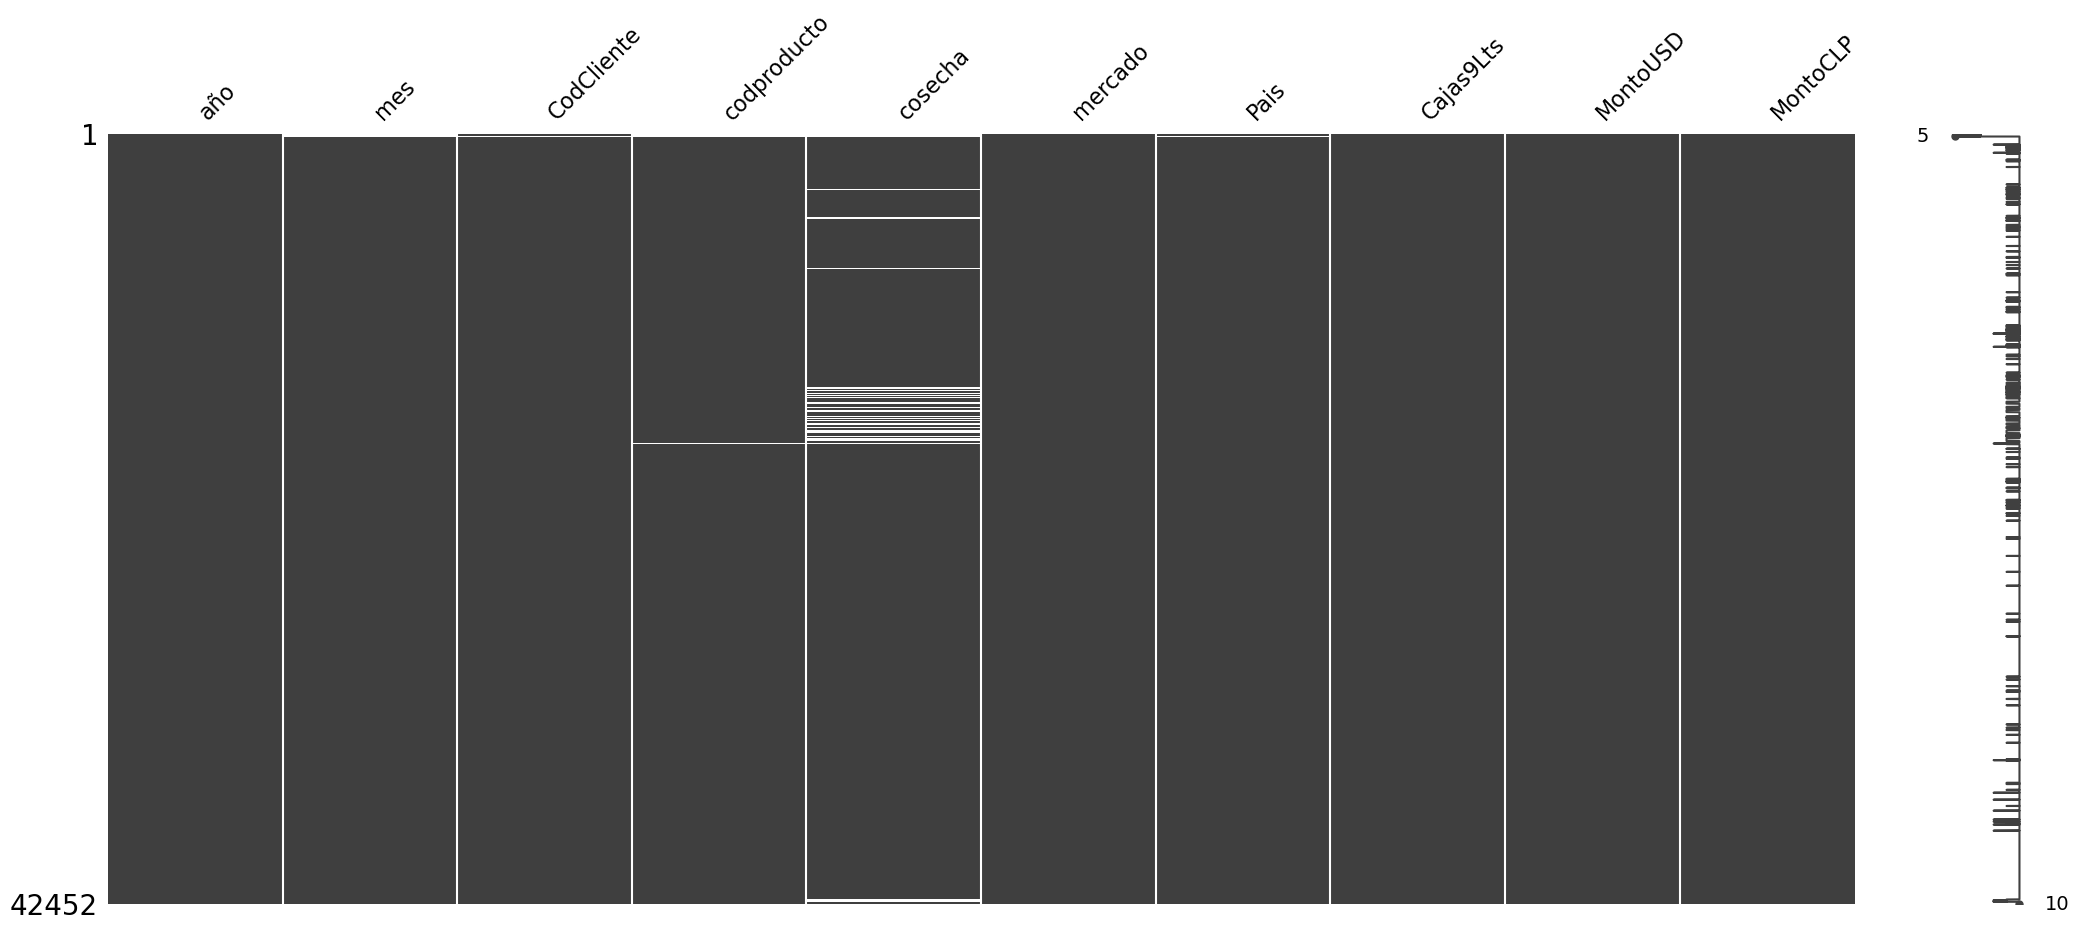

In [675]:
# Se visualiza los Nulos
msgn.matrix(df)

#### 4.2 Tratamiento de valores Nulos: campos 'mes' , 'CodCliente' y 'CodProducto'

In [676]:
# Filtrar las filas donde 'mes' es nulo
mes_nulos = df[df['mes'].isna()]

# Mostrar los años correspondientes a los valores nulos en 'mes'
años_con_mes_nulo = mes_nulos['año'].unique()

print("Años correspondientes a los valores nulos en 'mes':")
print(años_con_mes_nulo)

Años correspondientes a los valores nulos en 'mes':
[1999 2000 2001 2002 2003 2004]


In [677]:
# Filtrar las filas donde 'CodCliente' es nulo
cod_cliente_nulos = df[df['CodCliente'].isna()]

# Mostrar las primeras filas
print(cod_cliente_nulos.head(10))

# Mostrar cuántos registros tienen 'CodCliente' nulo
print(f"Total de registros con 'CodCliente' nulo: {len(cod_cliente_nulos)}")

     año  mes CodCliente codproducto cosecha        mercado       Pais  \
1   1999  NaN        NaN         NaN     NaN  NORTE AMERICA        USA   
4   1999  NaN        NaN         NaN     NaN           ASIA        NaN   
5   1999  NaN        NaN         NaN     NaN        OCEANIA        NaN   
6   1999  NaN        NaN         NaN     NaN         EUROPA        NaN   
7   1999  NaN        NaN         NaN     NaN  LATINOAMERICA  ARGENTINA   
8   1999  NaN        NaN         NaN     NaN  LATINOAMERICA       PERU   
9   1999  NaN        NaN         NaN     NaN  LATINOAMERICA     MEXICO   
11  2000  NaN        NaN         NaN     NaN           ASIA        NaN   
14  2000  NaN        NaN         NaN     NaN         EUROPA        NaN   
16  2000  NaN        NaN         NaN     NaN  NORTE AMERICA        USA   

    Cajas9Lts   MontoUSD  MontoCLP  
1      7098.0   228766.0       0.0  
4      4601.0   153235.0       0.0  
5      1870.0    41220.0       0.0  
6     37785.0  1034419.0       0.0  


Decisión: Se eliminan registros con valores NAN asociados a 'mes' y 'CodCliente' porque la mayoria pertecen a los registros con periodo 1999 hasta 2004 y representan el 0.5% del total de filas

In [678]:
# Eliminar filas con valores nulos en 'mes' y 'CodCliente'
df = df.dropna(subset=['mes', 'CodCliente', 'codproducto'])

# Mostrar la cantidad de filas después de la limpieza
print(f"Total de filas después de eliminar valores nulos: {len(df)}")

Total de filas después de eliminar valores nulos: 42265


#### 4.3 Tratamiento de valores Nulos: campo 'Cosecha'

Desición: Lo que buscamos es determinar la demanda global de vinos dada la venta histórica, es por ello que eliminamos la variable cosecha.

In [679]:
# Eliminar la columna 'cosecha'
df.drop(columns=['cosecha'], inplace=True)

# Verificar que la columna ha sido eliminada
df.head()

,año,mes,CodCliente,codproducto,mercado,Pais,Cajas9Lts,MontoUSD,MontoCLP
139,2005,1.0,967510807,SECASE04750,CHILE,CHILE,10.0,432.0,293596.0
140,2005,1.0,967510807,SESYSE04750,CHILE,CHILE,10.0,432.0,293596.0
141,2005,1.0,967510807,VMMARE03750,CHILE,CHILE,12.0,518.0,352316.0
142,2005,1.0,967510807,VMSBRE04750,CHILE,CHILE,3.0,130.0,88079.0
143,2005,1.0,967510807,VMCSRE03750,CHILE,CHILE,5.0,216.0,146798.0


#### 4.4 Tratamiento de valores Nulos: campo 'Pais'

Completar los valores nulos de la columna Pais basándonos en el 'mercado' y 'CodCliente' 

In [680]:
# Crear un diccionario basado en mercado, CodCliente y Pais (sin valores nulos)
mercado_cliente_pais = df.dropna(subset=['Pais']).groupby(['mercado', 'CodCliente'])['Pais'].first().to_dict()

# Función para rellenar los valores nulos de 'Pais'
def completar_pais(row):
    if pd.isna(row['Pais']):
        # Buscar en el diccionario el país basado en mercado y CodCliente
        return mercado_cliente_pais.get((row['mercado'], row['CodCliente']), None)
    else:
        return row['Pais']

# Aplicar la función a las filas con 'Pais' nulo
df['Pais'] = df.apply(completar_pais, axis=1)

# Mostrar las primeras filas para verificar los cambios
print(df[['mercado', 'CodCliente', 'Pais']].head(10))

# Verificar si quedan valores nulos
print(f"Valores nulos restantes en la columna 'Pais': {df['Pais'].isna().sum()}")


    mercado CodCliente   Pais
139   CHILE  967510807  CHILE
140   CHILE  967510807  CHILE
141   CHILE  967510807  CHILE
142   CHILE  967510807  CHILE
143   CHILE  967510807  CHILE
144   CHILE  967510807  CHILE
145   CHILE  967510807  CHILE
146   CHILE  967510807  CHILE
147   CHILE  967510807  CHILE
148   CHILE  967510807  CHILE
Valores nulos restantes en la columna 'Pais': 1


In [681]:
#evaluamos cual es el país que aun contiene NAN
df[df['Pais'].isna()]

,año,mes,CodCliente,codproducto,mercado,Pais,Cajas9Lts,MontoUSD,MontoCLP
10616,2010,2.0,2002-8,SESYSE08750,ASIA,None,56.0,3080.0,1673518.0


In [682]:
# Filtrar y mostrar las filas donde 'CodCliente' es igual a '2002-8'
codigo_cliente_filas = df[df['CodCliente'] == '2002-8']

# Mostrar las filas correspondientes
print(codigo_cliente_filas)

        año  mes CodCliente  codproducto mercado  Pais  Cajas9Lts  MontoUSD  \
10616  2010  2.0     2002-8  SESYSE08750    ASIA  None       56.0    3080.0   

        MontoCLP  
10616  1673518.0  


**Desición:** se elimina el unico registro con NAN de Pais porque no existen registros anteriores para el cliente: '2002-8' con los cuales comparar.

In [683]:
# Eliminar las filas donde 'CodCliente' es igual a '2002-8'
df= df[df['CodCliente'] != '2002-8']

# Verificar si las filas fueron eliminadas
print(f"Total de filas después de eliminar '2002-8': {len(df)}")


Total de filas después de eliminar '2002-8': 42264


In [684]:
# Contar cuántos NaN hay en cada columna
nan_count = df.isna().sum()
print("Valores NaN por columna:")
print(nan_count)

Valores NaN por columna:
año            0
mes            0
CodCliente     0
codproducto    0
mercado        0
Pais           0
Cajas9Lts      0
MontoUSD       0
MontoCLP       0
dtype: int64


### 5. Ingenieria de Columnas

#### 5.1 Eliminar campo MontoCLP
Solo nos quedaremos con el campo MontoUSD, que corresponde a las ventas en moneda dólar

In [685]:
# Eliminar la columna 'MontoCLP'
df.drop(columns=['MontoCLP'], inplace=True)

# Verificar que la columna ha sido eliminada
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42264 entries, 139 to 42451
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   año          42264 non-null  int64  
 1   mes          42264 non-null  float64
 2   CodCliente   42264 non-null  object 
 3   codproducto  42264 non-null  object 
 4   mercado      42264 non-null  object 
 5   Pais         42264 non-null  object 
 6   Cajas9Lts    42264 non-null  float64
 7   MontoUSD     42264 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [686]:
# Convertir la columna 'mes' y 'año' a tipo entero
df['año'] = df['año'].astype(int)
df['mes'] = df['mes'].astype(int)

In [687]:
# Verificar si hay valores infinitos
print(df[['año', 'mes']].replace([np.inf, -np.inf], np.nan).isna().sum())


año    0
mes    0
dtype: int64


### 5.2 Crear la columna Periodo 
Combinando 'año' y 'mes', establecerla como indice y elimninar 'año' y 'mes'

In [688]:
# Crear la columna 'periodo' combinando 'año' y 'mes' con un separador
df['periodo'] = df['año'].astype(str) + '-' + df['mes'].astype(int).astype(str).str.zfill(2)

# Mostrar las primeras filas para verificar el resultado
print(df[['año', 'mes', 'periodo']].head())

      año  mes  periodo
139  2005    1  2005-01
140  2005    1  2005-01
141  2005    1  2005-01
142  2005    1  2005-01
143  2005    1  2005-01


In [689]:
# Colocar la columna 'periodo' como la primera y eliminar 'año' y 'mes'
df = df[['periodo'] + [col for col in df.columns if col not in ['año', 'mes', 'periodo']]]

# Verificar el nuevo DataFrame
df.head()


,periodo,CodCliente,codproducto,mercado,Pais,Cajas9Lts,MontoUSD
139,2005-01,967510807,SECASE04750,CHILE,CHILE,10.0,432.0
140,2005-01,967510807,SESYSE04750,CHILE,CHILE,10.0,432.0
141,2005-01,967510807,VMMARE03750,CHILE,CHILE,12.0,518.0
142,2005-01,967510807,VMSBRE04750,CHILE,CHILE,3.0,130.0
143,2005-01,967510807,VMCSRE03750,CHILE,CHILE,5.0,216.0


### 6. Serie temporal

Lo que buscamos es determinar la demanda global de vinos dada la venta histórica, es por ello que eliminamos variables tales como Codcliente, Codproducto, mercado y país

In [690]:
# Eliminar las columnas 'CodCliente', 'codproducto', 'mercado' y 'Pais'
df.drop(columns=['CodCliente', 'codproducto', 'mercado', 'Pais'], inplace=True)

# Verificar que las columnas han sido eliminadas
print(df.head())

     periodo  Cajas9Lts  MontoUSD
139  2005-01       10.0     432.0
140  2005-01       10.0     432.0
141  2005-01       12.0     518.0
142  2005-01        3.0     130.0
143  2005-01        5.0     216.0


Agrupamos por Periodo y calculamos el monto total vendido por mes por mes

In [691]:
# Agrupar por 'periodo' y sumar los valores de 'Cajas9Lts' y 'MontoUSD'
df = df.groupby('periodo').sum().reset_index()

# Mostrar las primeras filas del DataFrame agrupado
print(df.head())


   periodo  Cajas9Lts  MontoUSD
0  2005-01     9828.0  326739.0
1  2005-02    12482.0  422192.0
2  2005-03    12542.0  396762.0
3  2005-04    13557.0  405280.0
4  2005-05    18870.0  613037.0


Agregamos variable Fecha

In [692]:
# Convertir 'periodo' a fecha usando el formato correcto 'YYYY-MM'
df['fecha'] = pd.to_datetime(df['periodo'].astype(str), format='%Y-%m')

# Reordenar las columnas para que 'fecha' esté en primer lugar
columnas = ['fecha'] + [col for col in df.columns if col != 'fecha']
df = df[columnas]

# Verificar las primeras filas
print(df.head())

       fecha  periodo  Cajas9Lts  MontoUSD
0 2005-01-01  2005-01     9828.0  326739.0
1 2005-02-01  2005-02    12482.0  422192.0
2 2005-03-01  2005-03    12542.0  396762.0
3 2005-04-01  2005-04    13557.0  405280.0
4 2005-05-01  2005-05    18870.0  613037.0


Normalizar las variables númericas

In [693]:
from sklearn.preprocessing import MinMaxScaler

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Normalizar las columnas 'Cajas9Lts' y 'MontoUSD' y crear nuevas columnas para los datos normalizados
df['Cajas9Lts_norm'] = scaler.fit_transform(df[['Cajas9Lts']])
df['MontoUSD_norm'] = scaler.fit_transform(df[['MontoUSD']])

# Verificar las nuevas columnas normalizadas
print(df[['Cajas9Lts', 'Cajas9Lts_norm', 'MontoUSD', 'MontoUSD_norm']].head())


   Cajas9Lts  Cajas9Lts_norm  MontoUSD  MontoUSD_norm
0     9828.0        0.203997  326739.0       0.151360
1    12482.0        0.263310  422192.0       0.201302
2    12542.0        0.264651  396762.0       0.187997
3    13557.0        0.287335  405280.0       0.192453
4    18870.0        0.406073  613037.0       0.301152


#### 6.1 Modelo Autorregresivo de primer orden (AR1)

- *Modelo genérico AR(1)*: 
  $
  \ Y_{t,i} = \beta_0 + \beta_1 Y_{t-1,i} + u_t
  $
  

  
- *Selección de $Y_t$*: 
  $
    Y_t \leftarrow MontoUSD_t
  $

- *Regresión Lineal Simple*: 
  $
  X \leftarrow Y_{t-1}, \quad Y \leftarrow Y_t
  $



Se eligió *MontoUSD* como la variable dependiente principal en este análisis de series temporales. Esta variable representa el valor en dólares de las ventas de vino a lo largo del tiempo, capturando la evolución de las ventas en diferentes países y mercados. Está directamente influenciada por la cantidad de cajas vendidas, así como por otros factores relacionados con la demanda y la oferta en el mercado del vino. Al modelar esta variable, se busca comprender los patrones de comportamiento de las ventas con el objetivo de prever la demanda futura de vinos, específicamente para el año 2025.



Por lo tanto, aplicando las fórmulas a nuestro objetivo, tendríamos:

- **1. Modelo genérico AR(1)**:
  $
  Y_{t,i} = \beta_0 + \beta_1 Y_{t-1,i} + u_t
  $

- Donde:

  $
  Y_{t,i} 
  $
  es el valor predicho de las ventas en dólares (*MontoUSD*) en el tiempo $ t $.

  $
  Y_{t-1,i} 
  $
  es el valor de las ventas en dólares en el mes anterior.

  $
  \beta_0 
  $
  es el intercepto o término constante, que captura el nivel base de las ventas.

  $
  \beta_1 
  $
  es el coeficiente de regresión que mide el impacto de las ventas del mes anterior ($Y_{t-1}$) sobre las ventas actuales ($Y_t$).

  $
  u_t 
  $
  es el término de error aleatorio en el tiempo $t$, que captura la parte de las ventas que no puede ser explicada por el modelo (factores externos o imprevistos).




Análisis visual. Graficar las ventas totales por mes

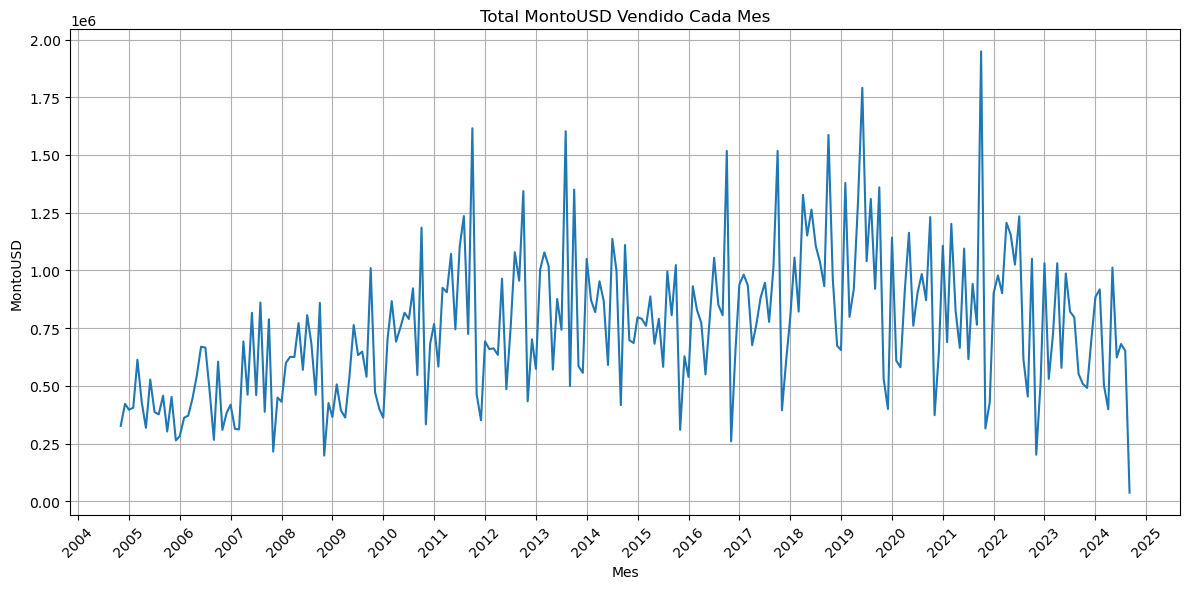

In [694]:
df['periodo'] = pd.to_datetime(df['periodo'], format='%Y-%m')
# Agrupar por año y mes, sumando 'MontoUSD'
df_monthly = df.groupby('periodo', as_index=False)['MontoUSD'].sum().copy()

# Graficar las ventas totales por mes
plt.figure(figsize=(12, 6))
plt.plot(df_monthly['periodo'], df_monthly['MontoUSD'])

# Añadir etiquetas y título
plt.title('Total MontoUSD Vendido Cada Mes')
plt.xlabel('Mes')
plt.ylabel('MontoUSD')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Ajustar automáticamente las etiquetas del eje x para evitar superposición
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))  # Mostrar cada interval meses
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato: Año-Mes

plt.grid(True)

plt.tight_layout()
plt.show()

Podemos observar algunos patrones que sugieren posibles problemas de no estacionariedad:

- *Tendencia*: Hay una tendencia al alza entre el 2004 y el añp 2012, y una a la baja entre el año 2018 y 2024.

- *Varianza No constante*: La varianza parece aumentar y luego disminuir en diferentes partes de la serie. En un periodo (2008-2012) las fluctuaciones parecen ser más amplias, mientras que en otras épocas (2016-2018) las ventas parecen estabilizarse un poco. Este tipo de comportamiento es un indicativo de que la serie puede no ser estacionaria.

- *Estacionalidad:* Es probable que haya estacionalidad, ya que hay picos recurrentes en intervalos regulares. Esto sugiere que ciertos meses o épocas del año experimentan más ventas de manera repetitiva.

In [695]:
# Crear shifts
df_monthly['t-1']=df_monthly['MontoUSD'].shift(1) 
df_monthly['t-12']=df_monthly['MontoUSD'].shift(12)

# Botar Nans
df_monthly.dropna(inplace=True)

df_monthly.head()

,periodo,MontoUSD,t-1,t-12
12,2006-01-01,452437.0,302394.0,326739.0
13,2006-02-01,263808.0,452437.0,422192.0
14,2006-03-01,282101.0,263808.0,396762.0
15,2006-04-01,361765.0,282101.0,405280.0
16,2006-05-01,371528.0,361765.0,613037.0


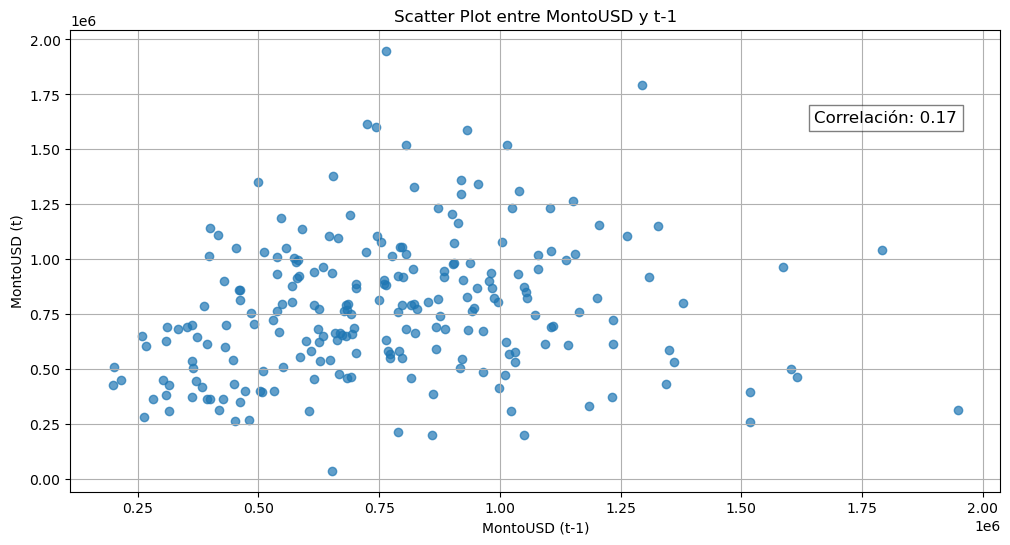

In [696]:
# Calcular la correlación entre ontoUSD y MontoUSD_t-1
correlacion = np.corrcoef(df_monthly['MontoUSD'], df_monthly['t-1'])[0, 1]

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 6))
plt.scatter(df_monthly['t-1'], df_monthly['MontoUSD'], alpha=0.7)

# Añadir etiquetas y título
plt.title('Scatter Plot entre MontoUSD y t-1')
plt.xlabel('MontoUSD (t-1)')
plt.ylabel('MontoUSD (t)')
plt.annotate(xy=(0.8,0.8), text=f'Correlación: {correlacion:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5), xycoords='axes fraction')

# Mostrar el gráfico
plt.grid(True)
plt.show()

In [697]:
ar1= LinearRegression(fit_intercept=True)
ar1.fit(X=df_monthly[['t-1']], y=df_monthly['MontoUSD'])

print("b_1 =",ar1.coef_[0],"b_0 =",ar1.intercept_)
print("R^2 =",ar1.score(df_monthly[['t-1']], df_monthly['MontoUSD']))



b_1 = 0.17426192266266044 b_0 = 635550.1420846399
R^2 = 0.02993333693634037


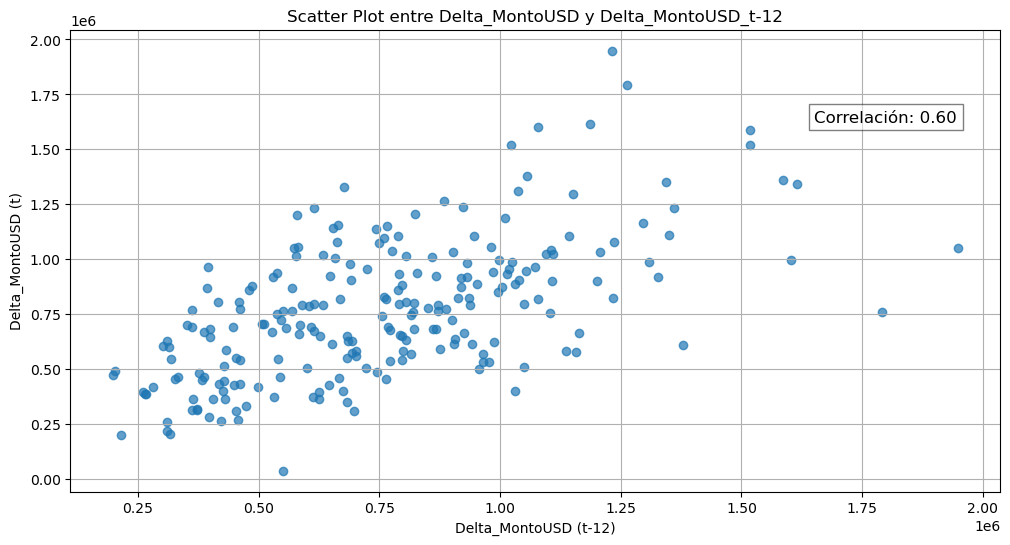

In [698]:

# Calcular la correlación entre Delta_MontoUSD y Delta_MontoUSD_t-1
correlacion = np.corrcoef(df_monthly['MontoUSD'], df_monthly['t-12'])[0, 1]

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 6))
plt.scatter(df_monthly['t-12'], df_monthly['MontoUSD'], alpha=0.7)


# Añadir etiquetas y título
plt.title('Scatter Plot entre Delta_MontoUSD y Delta_MontoUSD_t-12')
plt.xlabel('Delta_MontoUSD (t-12)')
plt.ylabel('Delta_MontoUSD (t)')
plt.annotate(xy=(0.8,0.8), text=f'Correlación: {correlacion:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5), xycoords='axes fraction')

# Mostrar el gráfico
plt.grid(True)
plt.show()

In [699]:
ar12= LinearRegression(fit_intercept=True)
ar12.fit(X=df_monthly[['t-12']], y=df_monthly['MontoUSD'])
print("b_1 =",ar12.coef_[0],"b_0 =",ar12.intercept_)
print("R^2 =",ar12.score(df_monthly[['t-12']], df_monthly['MontoUSD']))


b_1 = 0.5897164057978549 b_0 = 322257.8934671549
R^2 = 0.3563764377892541


Si bien dado que $\beta_1 = 0.58$ nos permite confirmar que existe una estacionalidad.

#### 6.2 Modelo Autorregresivo de primer a cuarto orden (AR1 ... AR4)

- *Modelo genérico AR(4)*: 
  $
  \ Y_{t,i} = \beta_0 + \beta_1 Y_{t-1,i} + \beta_2 Y_{t-2,i} + \beta_3 Y_{t-3,i} + \beta_4 Y_{t-4,i} + u_t
  $
  

  
- *Selección de*
  $
   Y_t: \: Y_t \leftarrow \Delta MontoUSD_t
  $

- *Regresión Lineal Multiple*: 
  $
  X_{t-1} \leftarrow Y_{t-1}, \: X_{t-2} \leftarrow Y_{t-2}, \: X_{t-3} \leftarrow Y_{t-3}, \: X_{t-4} \leftarrow Y_{t-4}; \quad Y \leftarrow Y_t
  $



Se eligió *$\Delta$MontoUSD* como la variable dependiente principal en este análisis de series temporales. Esta variable representa el cambio en el valor en dólares de las ventas de vino a lo largo del tiempo, capturando la variacion de las ventas totales.



Por lo tanto, aplicando las fórmulas a nuestro objetivo, tendríamos:

- **2. Modelo genérico AR(4)**:
  $
  \ Y_{t,i} = \beta_0 + \beta_1 Y_{t-1,i} + \beta_2 Y_{t-2,i} + \beta_3 Y_{t-3,i} + \beta_4 Y_{t-4,i} + u_t
  $

- Donde:

  $
  Y_{t,i} 
  $
  es el valor predicho de las ventas en dólares (*MontoUSD*) en el tiempo $ t $.

  $
  Y_{t-1,i} 
  $
  es el valor de las ventas en dólares en el mes anterior.

  $
  \beta_0 
  $
  es el intercepto o término constante, que captura el nivel base de las ventas.

  $
  \beta_{1\dots 4} 
  $
  es el coeficiente de regresión que mide el impacto del cambio de las ventas del mes correspondiente ($Y_{t-1\dots 4}$) sobre el cambio actual ($Y_t$).

  $
  u_t 
  $
  es el término de error aleatorio en el tiempo $t$, que captura la parte de la diferencia que no puede ser explicada por el modelo (factores externos o imprevistos).




Definición de una diferencia o cambio en una serie temporal
- *Definición de Delta_MontoUSD_t*:  

  $
  \Delta MontoUSD_t = MontoUSD_t - MontoUSD_{t-1}
  $

In [700]:
# Calcular la diferencia entre las ventas actuales y las del mes anterior (Delta_MontoUSD)
df_monthly['Delta_MontoUSD'] = df_monthly['MontoUSD'] - df_monthly['t-1']

# Crear la columna Delta_MontoUSD desplazada (rezago de un periodo, AR(1))
df_monthly['Delta_MontoUSD_t-1'] = df_monthly['Delta_MontoUSD'].shift(1)
df_monthly['Delta_MontoUSD_t-2'] = df_monthly['Delta_MontoUSD'].shift(2)
df_monthly['Delta_MontoUSD_t-3'] = df_monthly['Delta_MontoUSD'].shift(3)
df_monthly['Delta_MontoUSD_t-4'] = df_monthly['Delta_MontoUSD'].shift(4)
df_monthly.head()



,periodo,MontoUSD,t-1,t-12,Delta_MontoUSD,Delta_MontoUSD_t-1,Delta_MontoUSD_t-2,Delta_MontoUSD_t-3,Delta_MontoUSD_t-4
12,2006-01-01,452437.0,302394.0,326739.0,150043.0,NaN,NaN,NaN,NaN
13,2006-02-01,263808.0,452437.0,422192.0,-188629.0,150043.0,NaN,NaN,NaN
14,2006-03-01,282101.0,263808.0,396762.0,18293.0,-188629.0,150043.0,NaN,NaN
15,2006-04-01,361765.0,282101.0,405280.0,79664.0,18293.0,-188629.0,150043.0,NaN
16,2006-05-01,371528.0,361765.0,613037.0,9763.0,79664.0,18293.0,-188629.0,150043.0


In [701]:
# Eliminar las filas con NaN que se generan debido al desplazamiento
df_monthly = df_monthly.dropna()


# Mostrar las primeras filas del DataFrame limpio
df_monthly.head()

,periodo,MontoUSD,t-1,t-12,Delta_MontoUSD,Delta_MontoUSD_t-1,Delta_MontoUSD_t-2,Delta_MontoUSD_t-3,Delta_MontoUSD_t-4
16,2006-05-01,371528.0,361765.0,613037.0,9763.0,79664.0,18293.0,-188629.0,150043.0
17,2006-06-01,446907.0,371528.0,428516.0,75379.0,9763.0,79664.0,18293.0,-188629.0
18,2006-07-01,543585.0,446907.0,318475.0,96678.0,75379.0,9763.0,79664.0,18293.0
19,2006-08-01,669615.0,543585.0,527185.0,126030.0,96678.0,75379.0,9763.0,79664.0
20,2006-09-01,665869.0,669615.0,386498.0,-3746.0,126030.0,96678.0,75379.0,9763.0


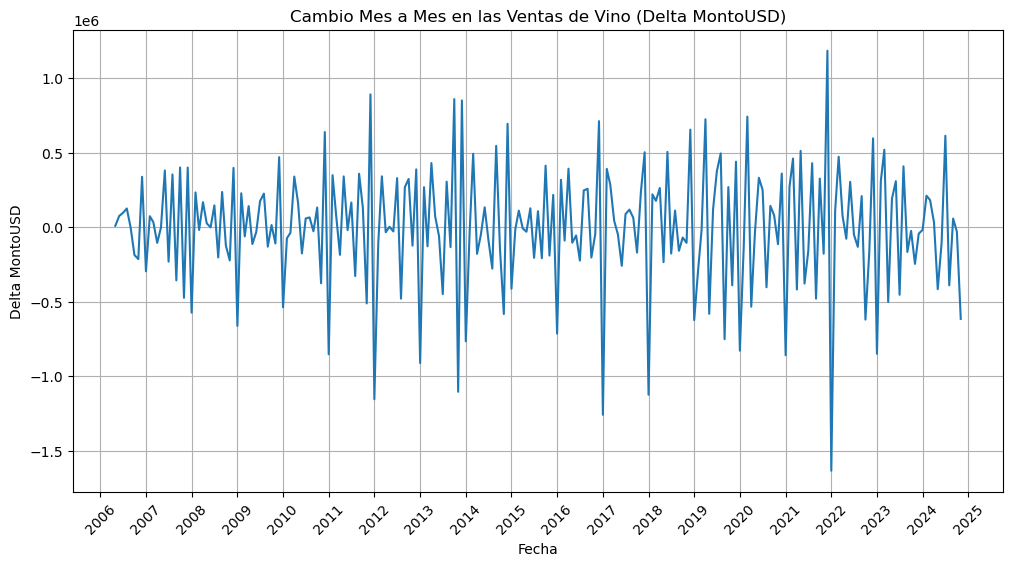

In [702]:
# Graficar la diferencia en MontoUSD (Delta MontoUSD)
plt.figure(figsize=(12, 6))
plt.plot(df_monthly['periodo'], df_monthly['Delta_MontoUSD'])
plt.title('Cambio Mes a Mes en las Ventas de Vino (Delta MontoUSD)')
plt.xlabel('Fecha')
plt.ylabel('Delta MontoUSD')

# Ajustar automáticamente las etiquetas del eje x para evitar superposición

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))  # Mostrar cada interval meses
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato: Año

plt.grid(True)
plt.show()


In [703]:
#Observamos la estructura de la tabla
df_monthly.shape

(223, 9)

Grafico de dispersión

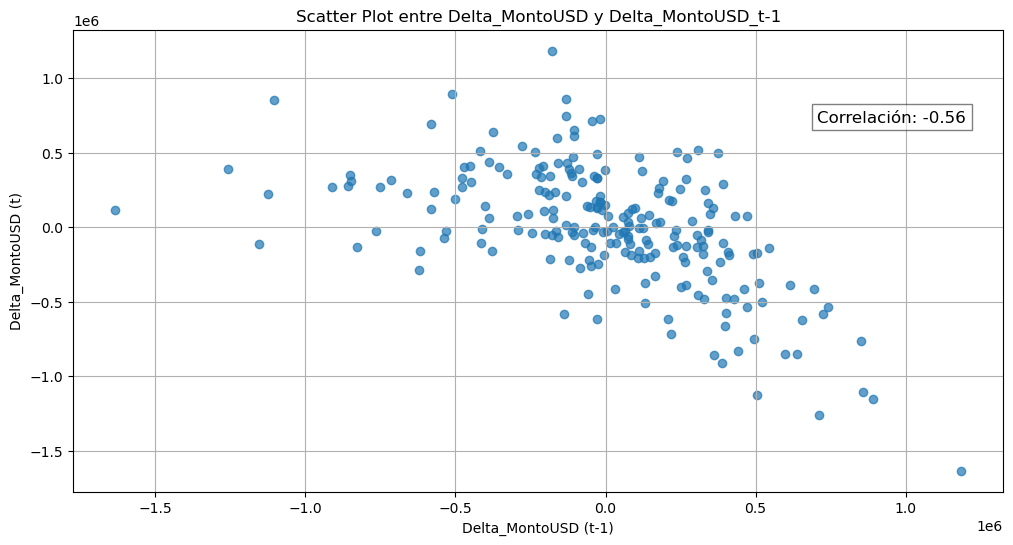

In [704]:
# Calcular la correlación entre Delta_MontoUSD y Delta_MontoUSD_t-1
correlacion = np.corrcoef(df_monthly['Delta_MontoUSD'], df_monthly['Delta_MontoUSD_t-1'])[0, 1]

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 6))
plt.scatter(df_monthly['Delta_MontoUSD_t-1'], df_monthly['Delta_MontoUSD'], alpha=0.7)

# Añadir etiquetas y título
plt.title('Scatter Plot entre Delta_MontoUSD y Delta_MontoUSD_t-1')
plt.xlabel('Delta_MontoUSD (t-1)')
plt.ylabel('Delta_MontoUSD (t)')
plt.annotate(xy=(0.8,0.8), text=f'Correlación: {correlacion:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5), xycoords='axes fraction')

# Mostrar el gráfico
plt.grid(True)
plt.show()

La correlación de -0.56 indica que existe una correlación negativa moderada entre los cambios en las ventas de un mes y los cambios del mes anterior. Esto sugiere que, en general, si el cambio en las ventas en el mes anterior fue positivo, es probable que el cambio en el mes actual sea negativo, y viceversa. Es decir, tiende a cambiar de dirección en tiempos secuenciales.

##### 6.2.1 Modelo Autorregresivo de primer orden (AR1)
- Este modelo se crea para poder comparar eventualmente con el de 4to orden



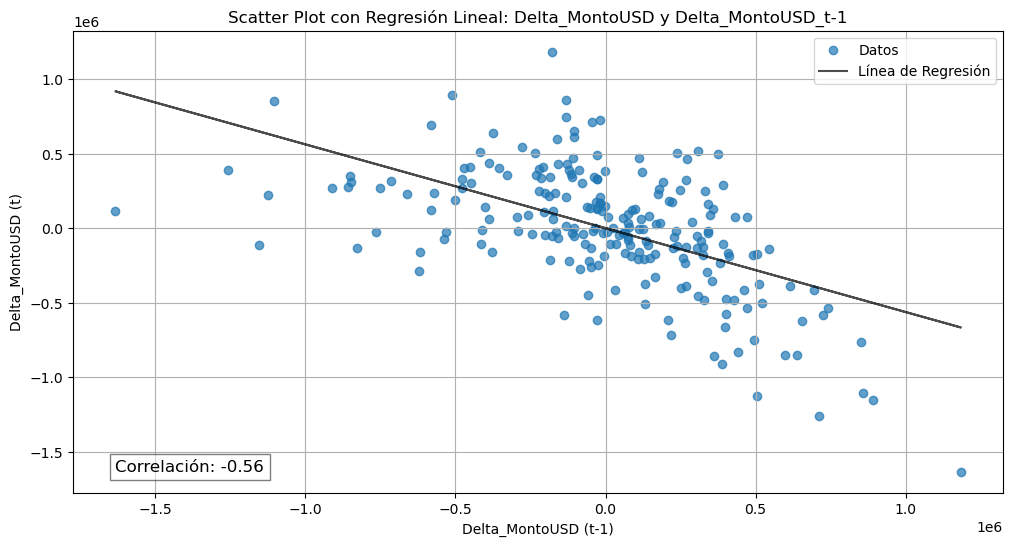

In [705]:
# Extraer los datos
X = df_monthly[['Delta_MontoUSD_t-1']].dropna()  # Valores de Delta_MontoUSD_t-1 (independiente)
Y = df_monthly['Delta_MontoUSD'].dropna()  # Valores de Delta_MontoUSD (dependiente)

# Alinear los datos eliminando las filas NaN en ambas columnas
aligned_data = pd.concat([X, Y], axis=1).dropna()
X = aligned_data['Delta_MontoUSD_t-1'].values.reshape(-1, 1)
Y = aligned_data['Delta_MontoUSD'].values

# Calcular la correlación entre Delta_MontoUSD y Delta_MontoUSD_t-1
correlacion = np.corrcoef(Y, X[:, 0])[0, 1]

# Ajustar el modelo de regresión lineal
reg = LinearRegression().fit(X, Y)
Y_pred = reg.predict(X)  # Predicciones de la regresión lineal

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 6))
plt.scatter(X, Y, alpha=0.7, label='Datos')
plt.plot(X, Y_pred, color='black', label='Línea de Regresión', alpha=0.7)

# Añadir etiquetas y título
plt.title('Scatter Plot con Regresión Lineal: Delta_MontoUSD y Delta_MontoUSD_t-1')
plt.xlabel('Delta_MontoUSD (t-1)')
plt.ylabel('Delta_MontoUSD (t)')
plt.text(X.min(), Y.min(), f'Correlación: {correlacion:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()


- Calculo de R2

In [706]:

# Ajustar el modelo de regresión lineal
reg = LinearRegression().fit(X, Y)

# Calcular R^2
r_squared_1 = reg.score(X, Y)

# Mostrar el valor de R^2
print(f"R^2: {r_squared_1:.4f}")


R^2: 0.3130


$R^2=0.3130$ indica que el modelo explica aproximadamente el $31.3%$ de la variabilidad en los cambios en las ventas $(\Delta MontoUSD)$ en función de los cambios del mes anterior  $(\Delta MontoUSD_{t-1})$. Esto significa que hay factores adicionales que afectan las ventas que no están capturados únicamente por el cambio en las ventas del mes anterior.

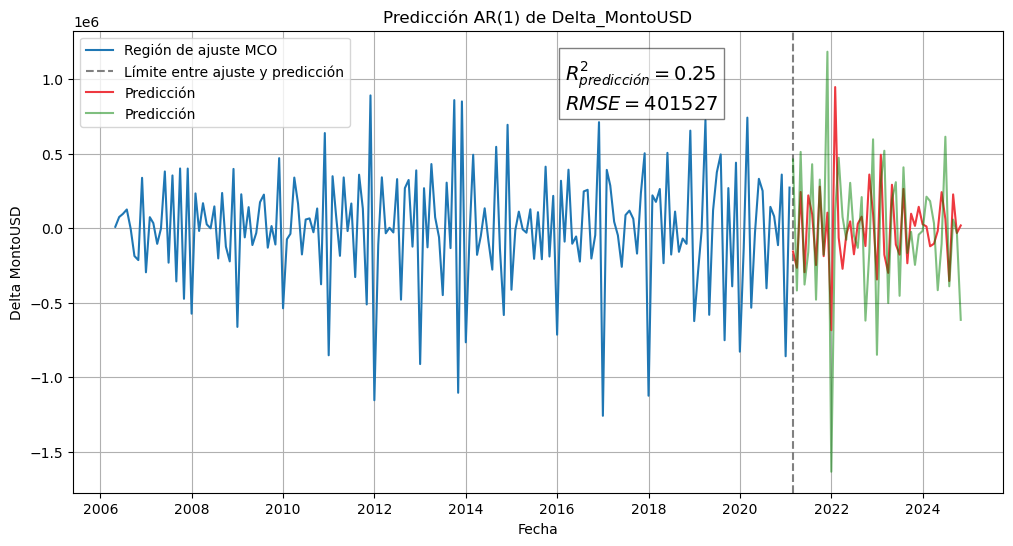

In [707]:
# Definir la longitud del conjunto de entrenamiento (80% de los datos)
n_train = int(len(df_monthly) * 0.8)

# Extraer los datos de Delta_MontoUSD y Delta_MontoUSD_t-1
X = df_monthly[['Delta_MontoUSD_t-1']].dropna().values.reshape(-1, 1)
Y = df_monthly['Delta_MontoUSD'].dropna().values

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test = X[:n_train], X[n_train:]
Y_train, Y_test = Y[:n_train], Y[n_train:]

# Ajustar el modelo AR(1) usando regresión lineal
model = LinearRegression().fit(X_train, Y_train)

# Realizar predicciones sobre el conjunto de prueba
Y_pred = model.predict(X_test)

# Crear un vector de fechas para la predicción
fechas = df_monthly['periodo'].values

# Graficar los resultados
plt.figure(figsize=(12, 6))

# Gráfica del conjunto de entrenamiento (Región de ajuste MCO)
plt.plot(fechas[:n_train], Y_train, linestyle='-', label='Región de ajuste MCO')
plt.axvline(x=fechas[n_train], color='gray', linestyle='--', label='Límite entre ajuste y predicción')

# Gráfica de la predicción
plt.plot(fechas[n_train:], Y_pred, color='#ee3940', linestyle='-', label='Predicción')
plt.plot(fechas[n_train:], Y_test, color='g', linestyle='-', label='Predicción', alpha=0.5)

# Calcular R^2 del conjunto de entrenamiento
r_squared_1_pred = model.score(X_test, Y_test)

# Calcular el RMSE
rmse_1 = root_mean_squared_error(Y_test, Y_pred)


# Añadir etiquetas y título
plt.title('Predicción AR(1) de Delta_MontoUSD')
plt.xlabel('Fecha')
plt.ylabel('Delta MontoUSD')
plt.text(fechas[int(n_train/1.5)], 800000, f'$R^2_{{\t{{predicción}}}} = {r_squared_1_pred:.2f}$ \n$RMSE = {rmse_1:.0f}$', fontsize=14, bbox=dict(facecolor='white', alpha=0.5))

# Añadir la leyenda
plt.legend()

# Mostrar la cuadrícula y el gráfico
plt.grid(True)
plt.show()


Identificar Estacionariedad

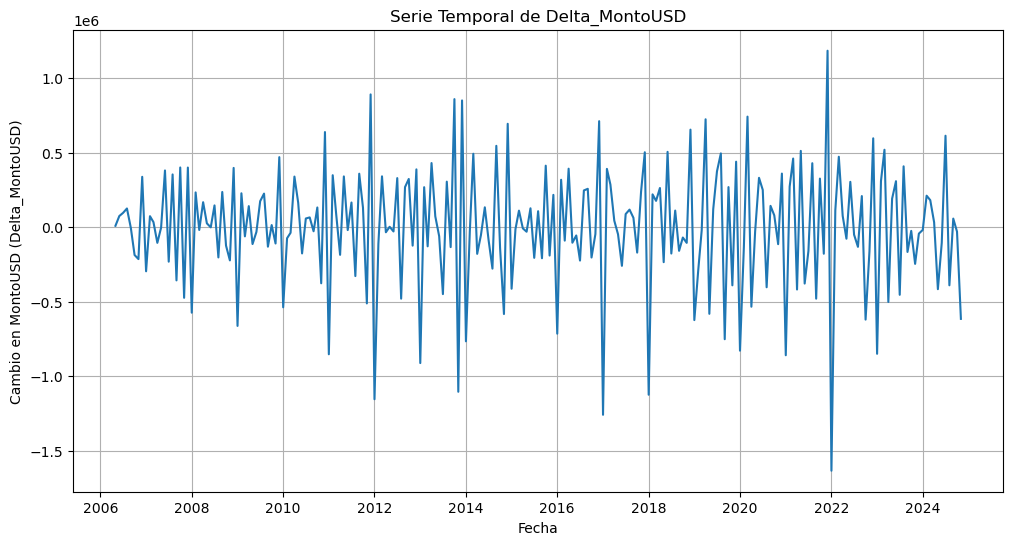

In [708]:
# Graficar la serie temporal de Delta_MontoUSD
plt.figure(figsize=(12, 6))
plt.plot(df_monthly['periodo'], df_monthly['Delta_MontoUSD'], linestyle='-')

# Añadir etiquetas y título
plt.title('Serie Temporal de Delta_MontoUSD')
plt.xlabel('Fecha')
plt.ylabel('Cambio en MontoUSD (Delta_MontoUSD)')
# plt.legend(loc='upper right')
plt.grid(True)

# Mostrar el gráfico
plt.show()


Verificar si el modelo es estacionario:

Intercepto $\beta_0: -966.97$  
Coeficiente $\beta_1: -0.5622 \Rightarrow |\beta_1| = 0.5622 < 1$

##### 6.2.2 Modelo Autorregresivo de segundo orden (AR2)

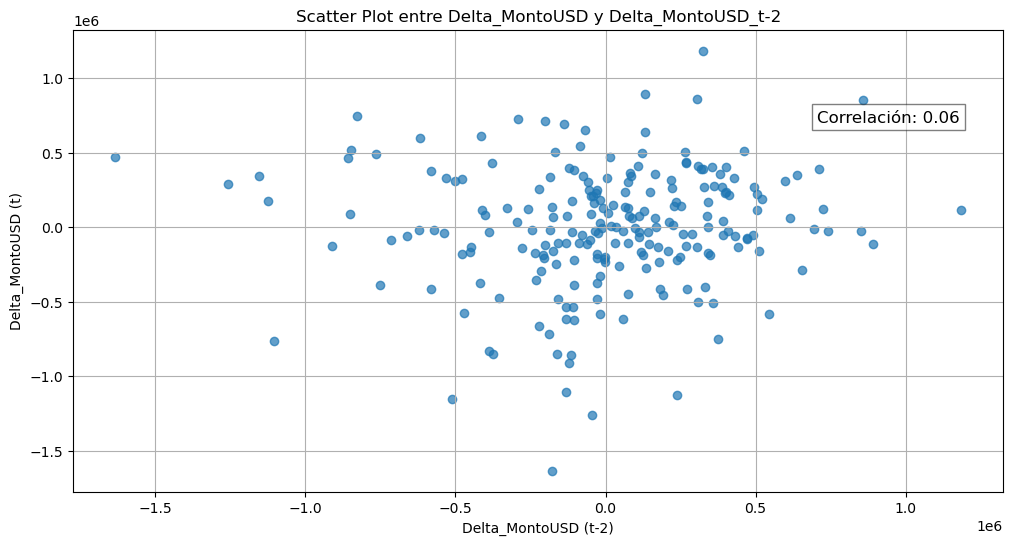

In [709]:
# Calcular la correlación entre Delta_MontoUSD y Delta_MontoUSD_t-1
correlacion = np.corrcoef(df_monthly['Delta_MontoUSD'], df_monthly['Delta_MontoUSD_t-2'])[0, 1]

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 6))
plt.scatter(df_monthly['Delta_MontoUSD_t-2'], df_monthly['Delta_MontoUSD'], alpha=0.7)

# Añadir etiquetas y título
plt.title('Scatter Plot entre Delta_MontoUSD y Delta_MontoUSD_t-2')
plt.xlabel('Delta_MontoUSD (t-2)')
plt.ylabel('Delta_MontoUSD (t)')
plt.annotate(xy=(0.8,0.8), text=f'Correlación: {correlacion:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5), xycoords='axes fraction')

# Mostrar el gráfico
plt.grid(True)
plt.show()

In [710]:
# Extraer los datos
X = df_monthly[['Delta_MontoUSD_t-1','Delta_MontoUSD_t-2']]  # Valores de Delta_MontoUSD_t-1, t-2 (independiente)
Y = df_monthly['Delta_MontoUSD']  # Valores de Delta_MontoUSD (dependiente)


# Ajustar el modelo de regresión lineal
reg = LinearRegression().fit(X, Y)
Y_pred = reg.predict(X)  # Predicciones de la regresión lineal

r2 = reg.score(X, Y)
n = X_test.shape[0]    
p = X_test.shape[1]  

adjusted_r2_2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"R² Ajustado: {adjusted_r2_2}")

R² Ajustado: 0.3905302928360995


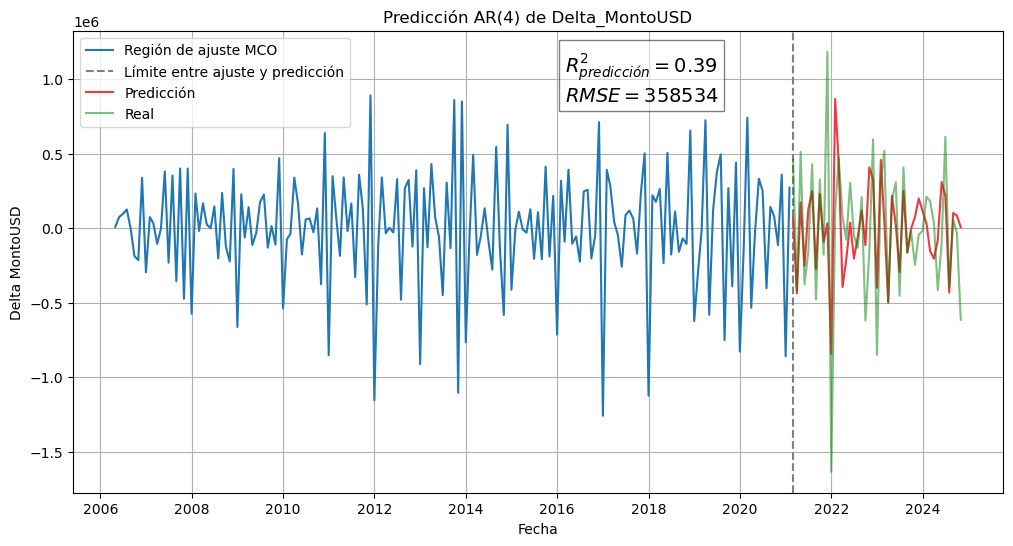

In [711]:
# Definir la longitud del conjunto de entrenamiento (80% de los datos)
n_train = int(len(df_monthly) * 0.8)

# Extraer los datos de Delta_MontoUSD y Delta_MontoUSD_t-1
X = df_monthly[['Delta_MontoUSD_t-1','Delta_MontoUSD_t-2']].values
Y = df_monthly['Delta_MontoUSD'].values

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test = X[:n_train], X[n_train:]
Y_train, Y_test = Y[:n_train], Y[n_train:]

# Ajustar el modelo AR(1) usando regresión lineal
model = LinearRegression().fit(X_train, Y_train)

# Realizar predicciones sobre el conjunto de prueba
Y_pred = model.predict(X_test)

# Crear un vector de fechas para la predicción
fechas = df_monthly['periodo'].values

# Graficar los resultados
plt.figure(figsize=(12, 6))

# Gráfica del conjunto de entrenamiento (Región de ajuste MCO)
plt.plot(fechas[:n_train], Y_train, linestyle='-', label='Región de ajuste MCO')
plt.axvline(x=fechas[n_train], color='gray', linestyle='--', label='Límite entre ajuste y predicción')

# Gráfica de la predicción
plt.plot(fechas[n_train:], Y_pred, color='#ee3940', linestyle='-', label='Predicción')
plt.plot(fechas[n_train:], Y_test, color='g', linestyle='-', label='Real', alpha=0.5)
# Calcular R^2 del conjunto de entrenamiento
r_squared = model.score(X_test, Y_test)
adj_r2_2 = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
# Calcular RMSE
rmse_2 = root_mean_squared_error(Y_test, Y_pred)

# Añadir etiquetas y título
plt.title('Predicción AR(4) de Delta_MontoUSD')
plt.xlabel('Fecha')
plt.ylabel('Delta MontoUSD')
plt.text(fechas[int(n_train/1.5)], 850000, f'$R^2_{{\t{{predicción}}}}= {adj_r2_2:.2f}$ \n$RMSE = {rmse_2:.0f}$', fontsize=14, bbox=dict(facecolor='white', alpha=0.5))

# Añadir la leyenda
plt.legend()

# Mostrar la cuadrícula y el gráfico
plt.grid(True)
plt.show()


In [714]:
coef = model.coef_

print(f"Coeficientes del modelo: β₀ = {model.intercept_:.0f}, β₁ = {coef[0]:.4f}, β₂ = {coef[1]:.4f}")

Coeficientes del modelo: β₀ = 3745, β₁ = -0.7636, β₂ = -0.3239


Verificar si el modelo es estacionario:

Intercepto $\beta_0: 3745$   

Coeficientes:  
- $\beta_1: -0.7636$
- $\beta_2: -0.3239$

Todos con valor absoluto menor a $1$

##### 6.2.3 Modelo Autorregresivo de tercer orden (AR3)

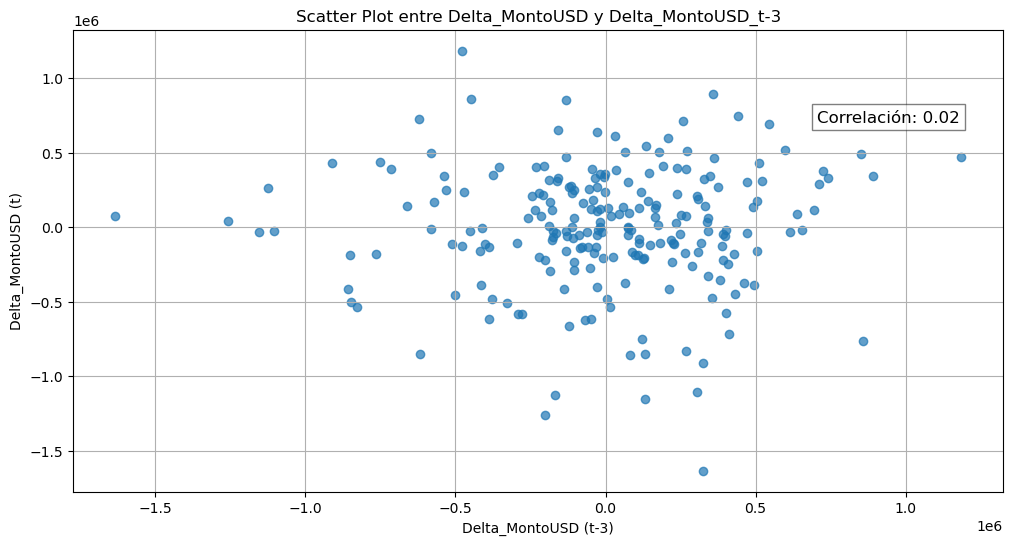

In [715]:
# Calcular la correlación entre Delta_MontoUSD y Delta_MontoUSD_t-1
correlacion = np.corrcoef(df_monthly['Delta_MontoUSD'], df_monthly['Delta_MontoUSD_t-3'])[0, 1]

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 6))
plt.scatter(df_monthly['Delta_MontoUSD_t-3'], df_monthly['Delta_MontoUSD'], alpha=0.7)

# Añadir etiquetas y título
plt.title('Scatter Plot entre Delta_MontoUSD y Delta_MontoUSD_t-3')
plt.xlabel('Delta_MontoUSD (t-3)')
plt.ylabel('Delta_MontoUSD (t)')
plt.annotate(xy=(0.8,0.8), text=f'Correlación: {correlacion:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5), xycoords='axes fraction')

# Mostrar el gráfico
plt.grid(True)
plt.show()

In [716]:
# Extraer los datos
X = df_monthly[['Delta_MontoUSD_t-1','Delta_MontoUSD_t-2', 'Delta_MontoUSD_t-3']]  # Valores de Delta_MontoUSD_t-1, ..., t-3 (independiente)
Y = df_monthly['Delta_MontoUSD']  # Valores de Delta_MontoUSD (dependiente)


# Ajustar el modelo de regresión lineal
reg = LinearRegression().fit(X, Y)
Y_pred = reg.predict(X)  # Predicciones de la regresión lineal

r2 = reg.score(X, Y)
n = X_test.shape[0]    
p = X_test.shape[1]  

adjusted_r2_3 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"R² Ajustado: {adjusted_r2_3}")

R² Ajustado: 0.40996818642050714


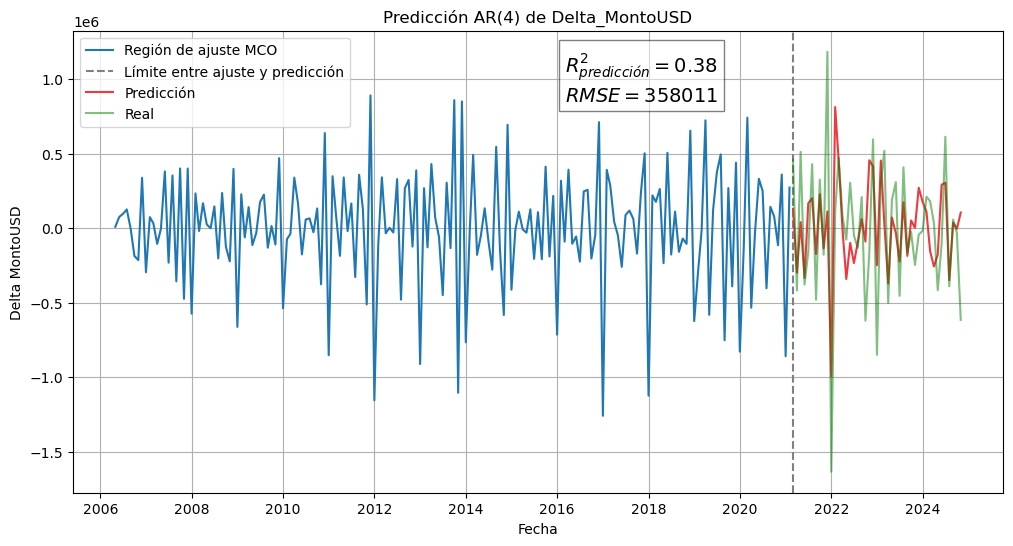

In [717]:
# Definir la longitud del conjunto de entrenamiento (80% de los datos)
n_train = int(len(df_monthly) * 0.8)

# Extraer los datos de Delta_MontoUSD y Delta_MontoUSD_t-1
X = df_monthly[['Delta_MontoUSD_t-1','Delta_MontoUSD_t-2','Delta_MontoUSD_t-3']].values
Y = df_monthly['Delta_MontoUSD'].values

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test = X[:n_train], X[n_train:]
Y_train, Y_test = Y[:n_train], Y[n_train:]

# Ajustar el modelo AR(1) usando regresión lineal
model = LinearRegression().fit(X_train, Y_train)

# Realizar predicciones sobre el conjunto de prueba
Y_pred = model.predict(X_test)

# Crear un vector de fechas para la predicción
fechas = df_monthly['periodo'].values

# Graficar los resultados
plt.figure(figsize=(12, 6))

# Gráfica del conjunto de entrenamiento (Región de ajuste MCO)
plt.plot(fechas[:n_train], Y_train, linestyle='-', label='Región de ajuste MCO')
plt.axvline(x=fechas[n_train], color='gray', linestyle='--', label='Límite entre ajuste y predicción')

# Gráfica de la predicción
plt.plot(fechas[n_train:], Y_pred, color='#ee3940', linestyle='-', label='Predicción')
plt.plot(fechas[n_train:], Y_test, color='g', linestyle='-', label='Real', alpha=0.5)
# Calcular R^2 del conjunto de entrenamiento
r_squared = model.score(X_test, Y_test)
adj_r2_3 = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
# Calcular RMSE
rmse_3 = root_mean_squared_error(Y_test, Y_pred)

# Añadir etiquetas y título
plt.title('Predicción AR(4) de Delta_MontoUSD')
plt.xlabel('Fecha')
plt.ylabel('Delta MontoUSD')
plt.text(fechas[int(n_train/1.5)], 850000, f'$R^2_{{\t{{predicción}}}}= {adj_r2_3:.2f}$ \n$RMSE = {rmse_3:.0f}$', fontsize=14, bbox=dict(facecolor='white', alpha=0.5))

# Añadir la leyenda
plt.legend()

# Mostrar la cuadrícula y el gráfico
plt.grid(True)
plt.show()


In [719]:
coef = model.coef_

print(f"Coeficientes del modelo: β₀ = {model.intercept_:.0f}, β₁ = {coef[0]:.4f}, β₂ = {coef[1]:.4f}, β₃ = {coef[2]:.4f}")

Coeficientes del modelo: β₀ = 5549, β₁ = -0.8497, β₂ = -0.5304, β₃ = -0.2713


Verificar si el modelo es estacionario:

Intercepto $\beta_0: 5549$   

Coeficientes:  
- $\beta_1: -0.8497$
- $\beta_2: -0.5304$
- $\beta_3: -0.2713$

Todos con valor absoluto menor a $1$

##### 6.2.4 Modelo Autorregresivo de cuarto orden (AR4)

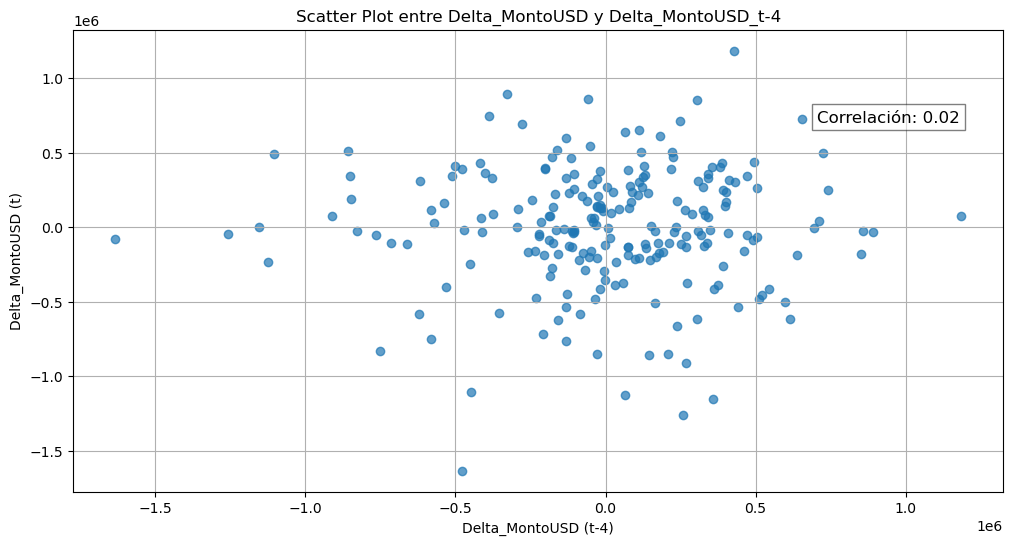

In [720]:
# Calcular la correlación entre Delta_MontoUSD y Delta_MontoUSD_t-1
correlacion = np.corrcoef(df_monthly['Delta_MontoUSD'], df_monthly['Delta_MontoUSD_t-4'])[0, 1]

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 6))
plt.scatter(df_monthly['Delta_MontoUSD_t-4'], df_monthly['Delta_MontoUSD'], alpha=0.7)

# Añadir etiquetas y título
plt.title('Scatter Plot entre Delta_MontoUSD y Delta_MontoUSD_t-4')
plt.xlabel('Delta_MontoUSD (t-4)')
plt.ylabel('Delta_MontoUSD (t)')
plt.annotate(xy=(0.8,0.8), text=f'Correlación: {correlacion:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5), xycoords='axes fraction')

# Mostrar el gráfico
plt.grid(True)
plt.show()

In [721]:
# Extraer los datos
X = df_monthly[['Delta_MontoUSD_t-1','Delta_MontoUSD_t-2','Delta_MontoUSD_t-3','Delta_MontoUSD_t-4']]  # Valores de Delta_MontoUSD_t-1...4 (independiente)
Y = df_monthly['Delta_MontoUSD'].dropna()  # Valores de Delta_MontoUSD (dependiente)


# Ajustar el modelo de regresión lineal
reg = LinearRegression().fit(X, Y)
Y_pred = reg.predict(X)  # Predicciones de la regresión lineal

r2 = reg.score(X, Y)
n = X_test.shape[0]    
p = X_test.shape[1]  

adjusted_r2_4 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"R² Ajustado: {adjusted_r2_4}")

R² Ajustado: 0.4048543073773091


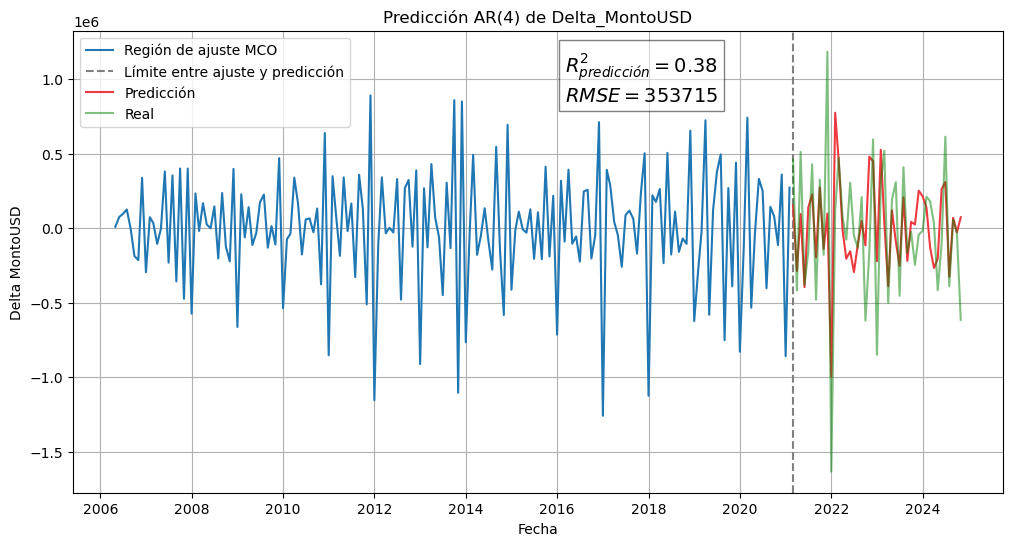

In [722]:
# Definir la longitud del conjunto de entrenamiento (80% de los datos)
n_train = int(len(df_monthly) * 0.8)

# Extraer los datos de Delta_MontoUSD y Delta_MontoUSD_t-1
X = X = df_monthly[['Delta_MontoUSD_t-1','Delta_MontoUSD_t-2','Delta_MontoUSD_t-3','Delta_MontoUSD_t-4']].values
Y = df_monthly['Delta_MontoUSD'].values

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test = X[:n_train], X[n_train:]
Y_train, Y_test = Y[:n_train], Y[n_train:]

# Ajustar el modelo AR(1) usando regresión lineal
model = LinearRegression().fit(X_train, Y_train)

# Realizar predicciones sobre el conjunto de prueba
Y_pred = model.predict(X_test)

# Crear un vector de fechas para la predicción
fechas = df_monthly['periodo'].values

# Graficar los resultados
plt.figure(figsize=(12, 6))

# Gráfica del conjunto de entrenamiento (Región de ajuste MCO)
plt.plot(fechas[:n_train], Y_train, linestyle='-', label='Región de ajuste MCO')
plt.axvline(x=fechas[n_train], color='gray', linestyle='--', label='Límite entre ajuste y predicción')

# Gráfica de la predicción
plt.plot(fechas[n_train:], Y_pred, color='#ee3940', linestyle='-', label='Predicción')
plt.plot(fechas[n_train:], Y_test, color='g', linestyle='-', label='Real', alpha=0.5)
# Calcular R^2 del conjunto de entrenamiento
r_squared = model.score(X_test, Y_test)
adj_r2_4 = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
# Calcular RMSE
rmse_4 = root_mean_squared_error(Y_test, Y_pred)

# Añadir etiquetas y título
plt.title('Predicción AR(4) de Delta_MontoUSD')
plt.xlabel('Fecha')
plt.ylabel('Delta MontoUSD')
plt.text(fechas[int(n_train/1.5)], 850000, f'$R^2_{{\t{{predicción}}}}= {adj_r2_4:.2f}$ \n$RMSE = {rmse_4:.0f}$', fontsize=14, bbox=dict(facecolor='white', alpha=0.5))

# Añadir la leyenda
plt.legend()

# Mostrar la cuadrícula y el gráfico
plt.grid(True)
plt.show()


In [723]:
coef = model.coef_

print(f"Coeficientes del modelo: β₀ = {model.intercept_:.0f}, β₁ = {coef[0]:.4f}, β₂ = {coef[1]:.4f}, β₃ = {coef[2]:.4f}, β₄ = {coef[3]:.4f}")



Coeficientes del modelo: β₀ = 6494, β₁ = -0.8782, β₂ = -0.5869, β₃ = -0.3621, β₄ = -0.1070


Verificar si el modelo es estacionario:

Intercepto $\beta_0: 6494$  
Coeficientes:  
- $\beta_1: -0.8782$
- $\beta_2: -0.5869$
- $\beta_3: -0.3621$
- $\beta_4: -0.1070$

Todos con valor absoluto menor a $1$

In [724]:
Resultados = pd.DataFrame({
    'AR(1)': {'RMSE': rmse_1, 'R² ajustado': r_squared_1, 'R² ajustado predicción': r_squared_1_pred},
    'AR(2)': {'RMSE': rmse_2, 'R² ajustado': adjusted_r2_2, 'R² ajustado predicción': adj_r2_2},
    'AR(3)': {'RMSE': rmse_3, 'R² ajustado': adjusted_r2_3, 'R² ajustado predicción': adj_r2_3},
    'AR(4)': {'RMSE': rmse_4, 'R² ajustado': adjusted_r2_4, 'R² ajustado predicción': adj_r2_4}
})
Resultados

,AR(1),AR(2),AR(3),AR(4)
RMSE,401527.407889,358534.317776,358010.575280,353715.329017
R² ajustado,0.312983,0.390530,0.409968,0.404854
R² ajustado predicción,0.252460,0.390112,0.377414,0.377441
